In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import cv2
import os

IMG_PATH = "../data/train/images/"

In [2]:
df = pd.read_csv('../data/train/landmarks.csv', sep='\t')

In [3]:
df.head(5)

file_name  Point_0_X  Point_0_Y  Point_1_X  \
0  07c5e48d938e8d82c0f10973d66183f3.jpg        162        311        159   
1  28e70684d6e2d6d75a6d3a973e4d4d93.jpg         90        376         89   
2  e7696776dc7b15ca3fa80d4332443e96.jpg        123        210        121   
3  199668f481aa5794c28657bace02fd84.jpg        109        203        107   
4  9ebb7d722fa1cece4fa0d7b2fd39b399.jpg         59        127         58   

   Point_1_Y  Point_2_X  Point_2_Y  Point_3_X  Point_3_Y  Point_4_X  ...  \
0        311        156        311        152        311        149  ...   
1        375         85        374         84        374         82  ...   
2        210        119        211        117        211        115  ...   
3        203        105        203        103        203        101  ...   
4        126         56        126         55        126         53  ...   

   Point_966_X  Point_966_Y  Point_967_X  Point_967_Y  Point_968_X  \
0          125          254          124          254          123   
1           87          307           85          309           87   
2           98          175           97          175           95   
3           75          159           73          158           73   
4           44           92           43           91           43   

   Point_968_Y  Point_969_X  Point_969_Y  Point_970_X  Point_970_Y  
0          254          112          163          191          166  
1          310           96          202          162          203  
2          176           80          119          128          115  
3          157           75          107          129          106  
4           91           58           61           84           68  

[5 rows x 1943 columns]

In [4]:
def make_landmarks(row):
    landmark = row[1:]
    land_mark_len = landmark.shape[0]
    landmark = landmark.reshape(int(land_mark_len/2), 2)
    return landmark

In [5]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [6]:
ROW_NUM, COL_NUM = 5, 10

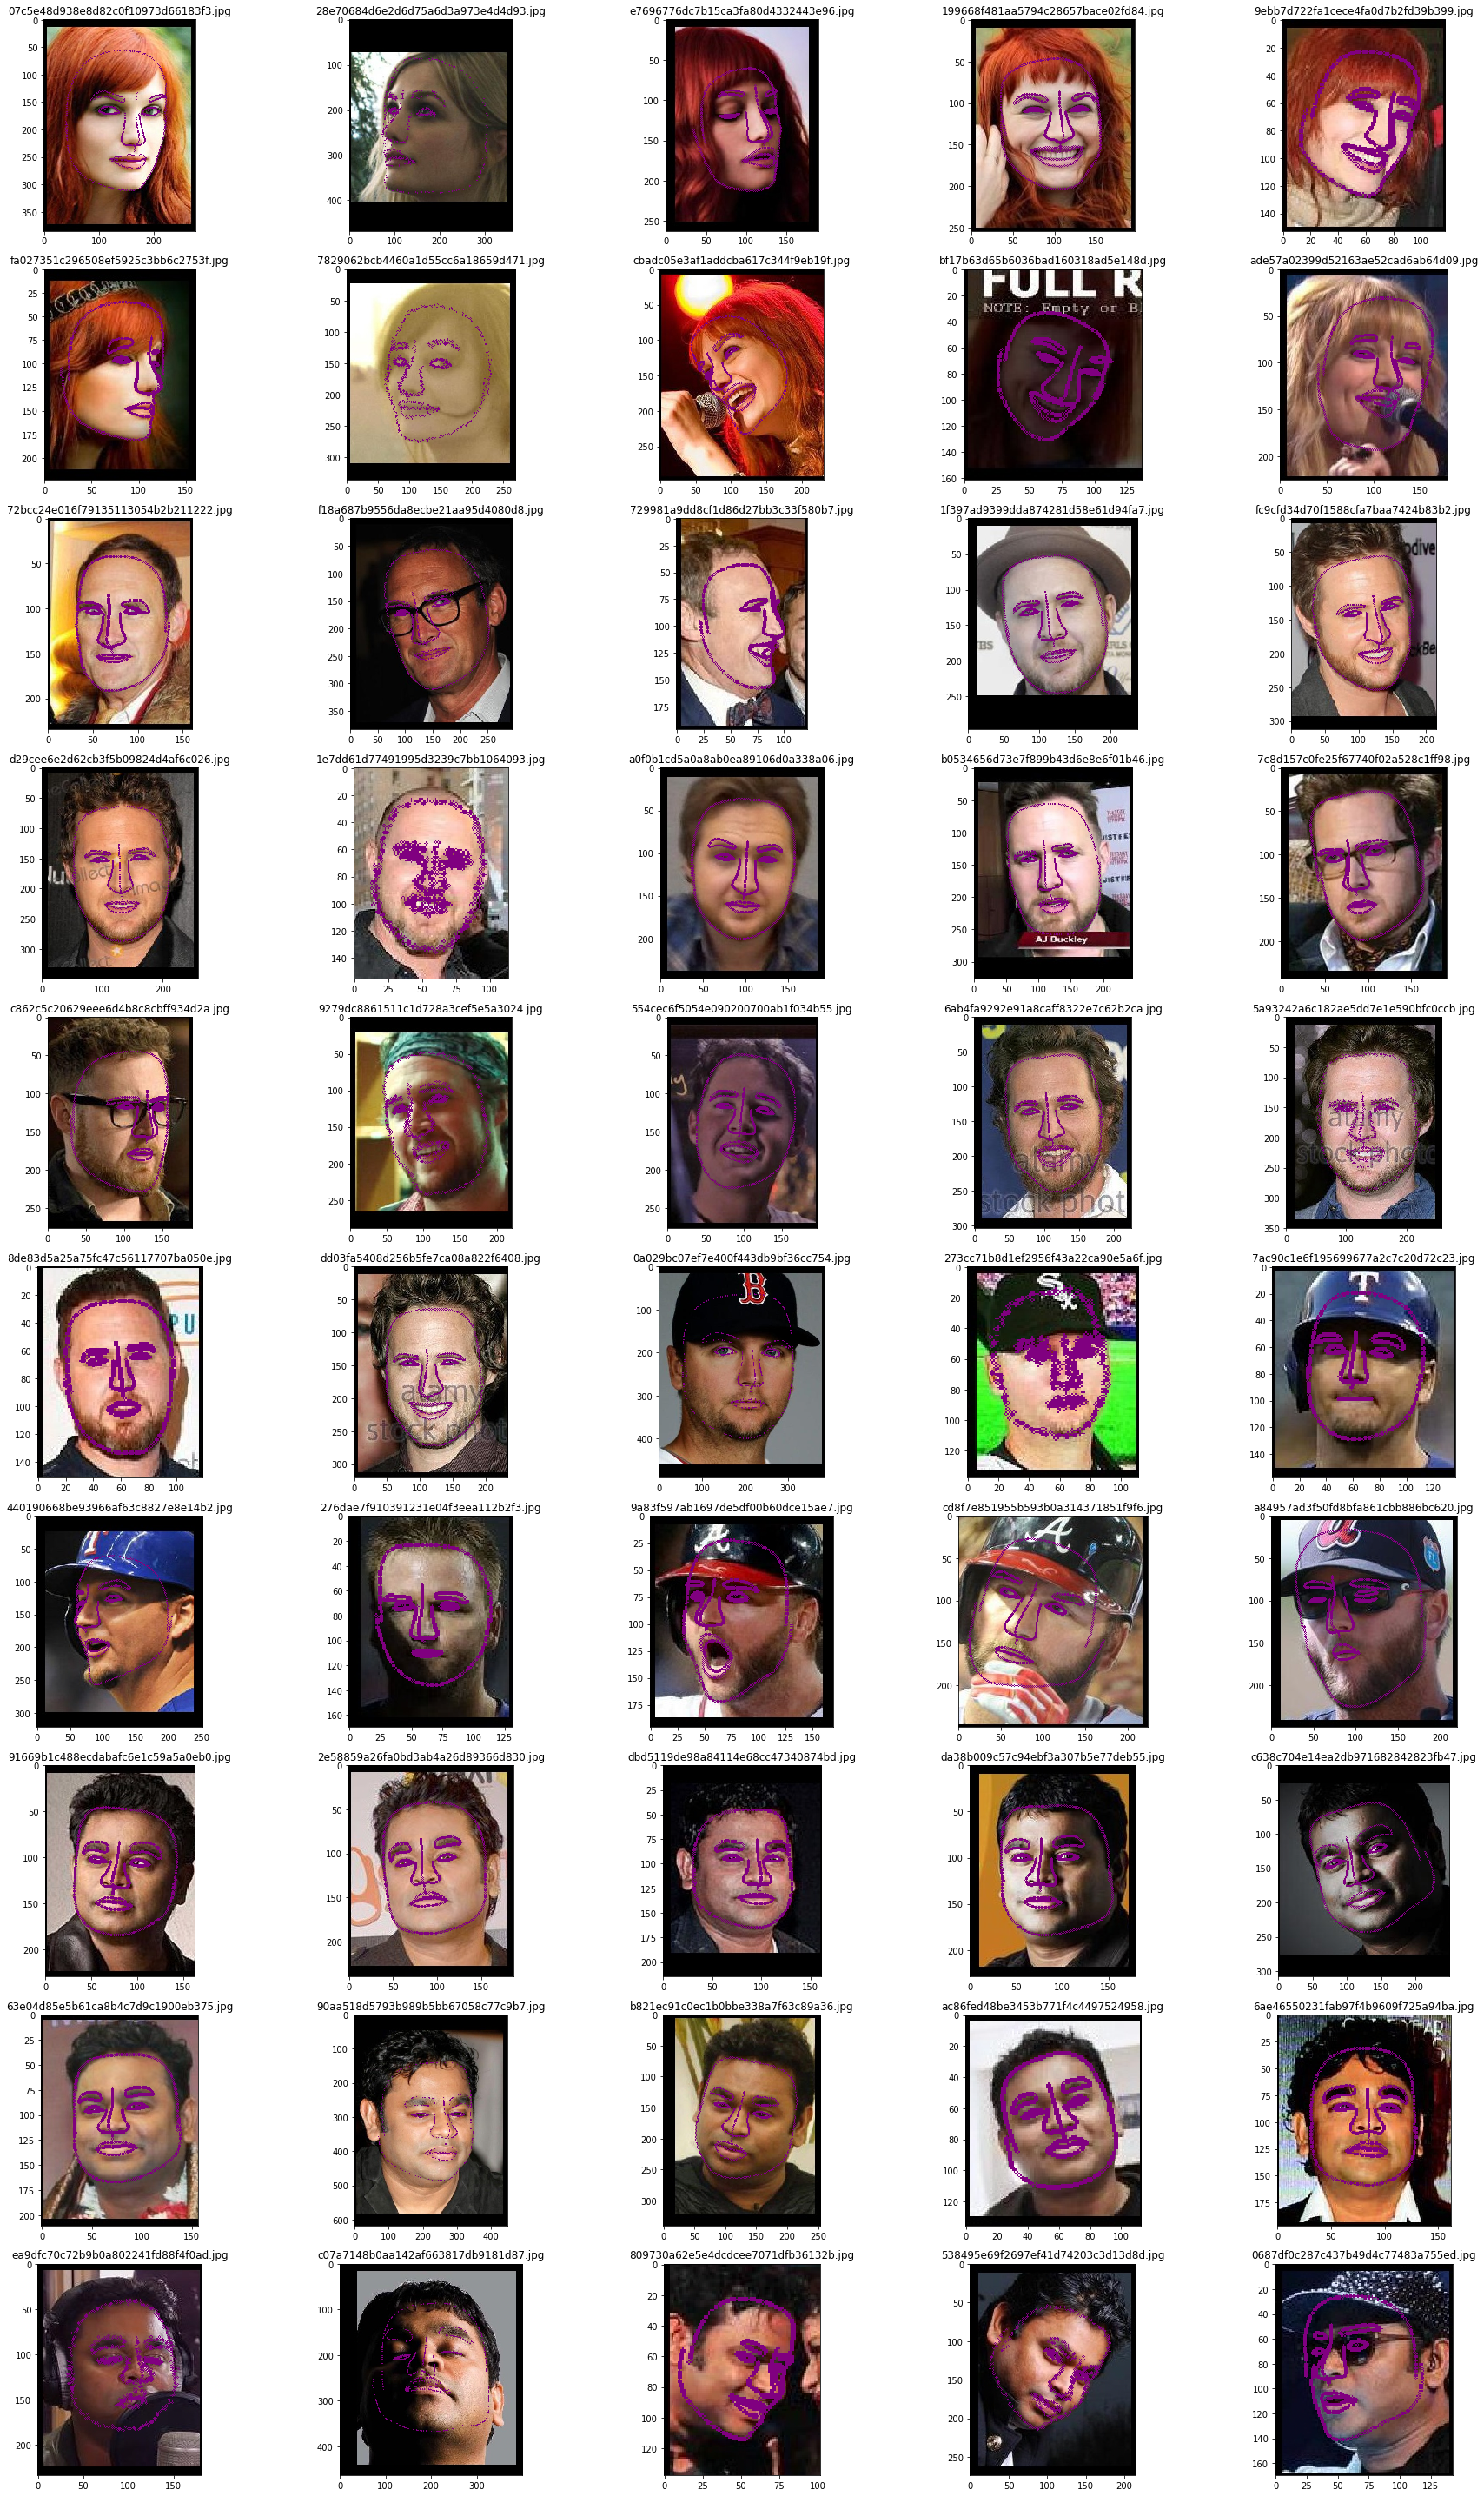

In [7]:
plt.figure(figsize=(25, ROW_NUM * 8))
for i in range(0, ROW_NUM * COL_NUM):
    file_name = df['file_name'].iloc[i]
    image = cv2.imread(IMG_PATH + file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    landmark = make_landmarks(df.iloc[i].values)
    image = draw_landmarks(image, landmark)

    plt.subplot(COL_NUM, ROW_NUM, i + 1)
    plt.imshow(image)
    plt.title(file_name)

plt.tight_layout()
plt.show()